In [103]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D
import urllib
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
fit_model = tf.keras.applications.ResNet152(include_top=False, input_shape=(224, 224, 3))

In [59]:
for i in fit_model.layers:
    i.trainable = False

In [60]:
fit_model.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [80]:
inp = Input(shape=(224, 224, 3))
model_layer = fit_model(inp)
avr_pool = GlobalAveragePooling2D()(model_layer)
dens = Dense(128, activation="relu")(avr_pool)
dens = Dense(60, activation="relu")(avr_pool)
out = Dense(4, activation="softmax")(dens)

model = tf.keras.Model(inp, out)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet152 (Functional)               │ (None, 7, 7, 2048)          │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 60)                  │         122,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             244 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,494,128 (223.14 MB)

 Trainable params: 123,184 (481.19 KB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [81]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [82]:
def read_data(path, width=224, height=224, length=200):
    images = np.empty((length, width, height, 3), dtype=np.float32)
    x = np.empty((length, width, height, 3), dtype=np.float32)
    y = np.empty((length,), dtype=np.int32)
    classes = {}
    ind = 0

    for i, p in enumerate(os.listdir(path)):
        class_path = os.path.join(path, p)
        if not os.path.isdir(class_path):
            continue
        classes[i] = p
        for img_name in os.listdir(class_path):
            if ind >= length:
                break
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert("RGB")
            img = img.resize((width, height))
            img = np.asarray(img)
            images[ind] = img
            x[ind] = tf.keras.applications.resnet.preprocess_input(img)
            y[ind] = i
            ind += 1
    assert ind == length, f"Expected {length}, got {ind}"
    return x, y, images / 255.0, classes

In [83]:
path = "Handmade-crafts-data"

In [84]:
x, y, images, classes = read_data(path)

In [85]:
classes

{0: 'ceramic', 1: 'embroidey', 2: 'glass-craft', 3: 'wooden-toy'}

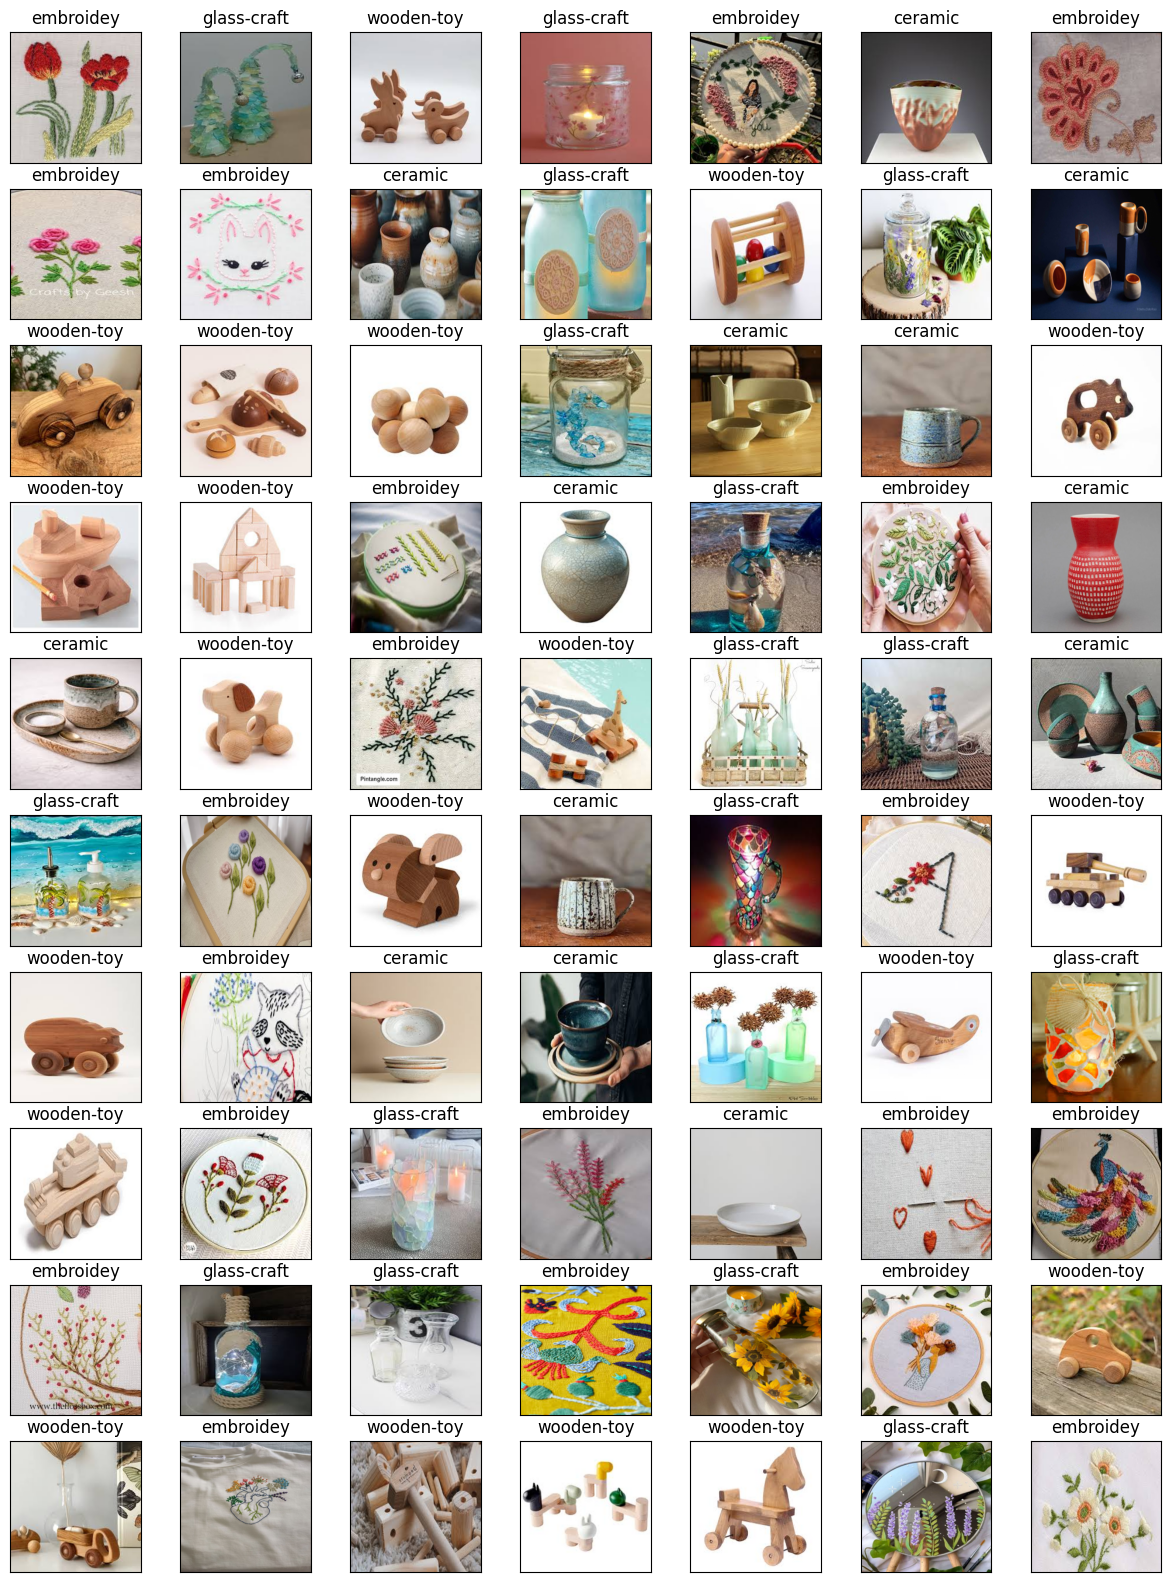

In [86]:
num_images = 70
plt.figure(figsize=(15, 20))
indexes = random.sample(range(0, 200), k=num_images)
k = 0
for i in range(num_images):
    ind = np.random.randint(0, len(x) - 1)
    plt.subplot(10, num_images // 10, i+1)
    plt.imshow(images[indexes[k]])
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[y[indexes[k]]])
    k += 1

In [87]:
x.shape, y.shape

((200, 224, 224, 3), (200,))

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [89]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [90]:
model.fit(x_train, y_train_cat, batch_size=25, epochs=3, validation_data=(x_test, y_test_cat))

Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 168s 21s/step - accuracy: 0.6800 - loss: 0.8244 - val_accuracy: 0.8800 - val_loss: 0.3276
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 122s 17s/step - accuracy: 0.9800 - loss: 0.0892 - val_accuracy: 0.9600 - val_loss: 0.1484
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 116s 21s/step - accuracy: 0.9933 - loss: 0.0273 - val_accuracy: 0.9800 - val_loss: 0.1105


In [91]:
def predict_num(filename, model, model_prep="resnet", k=5, width=224, height=224):
    img = Image.open(urllib.request.urlopen(filename)).convert("RGB")
    img = img.resize((width, height))
    img = np.asarray(img)
    plt.imshow(img, cmap="gray")
    img = eval(f"tf.keras.applications.{model_prep}.preprocess_input(img)")
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)[0]
    cl = p.argsort()[::-1][:k]
    res = p.argmax()
    p.sort()
    probs = p[::-1][:k]
    for p, i in zip(probs, cl):
        print(f"{classes[i]} - {float((p * 100)) :.4f} %")
    return int(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
glass-craft - 94.7057 %
wooden-toy - 3.0344 %
embroidey - 1.2809 %
ceramic - 0.9789 %


2

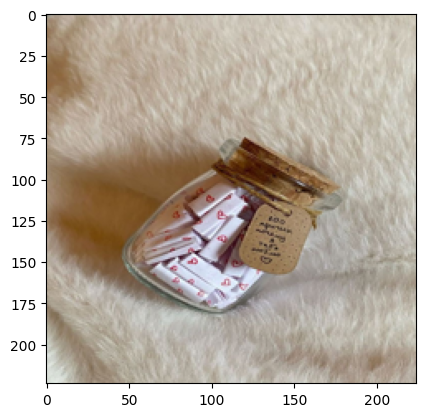

In [92]:
img_path = "https://i.pinimg.com/736x/3e/d7/40/3ed740570bbac9d4fed0e8d8567dff49.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
ceramic - 98.7460 %
glass-craft - 0.6048 %
embroidey - 0.5440 %
wooden-toy - 0.1052 %


0

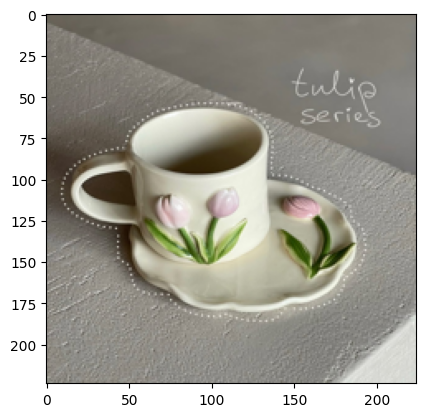

In [93]:
img_path = "https://i.pinimg.com/1200x/85/3a/03/853a031354665688165daeb52aba16c4.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
glass-craft - 95.9357 %
wooden-toy - 2.8833 %
ceramic - 1.1795 %
embroidey - 0.0015 %


2

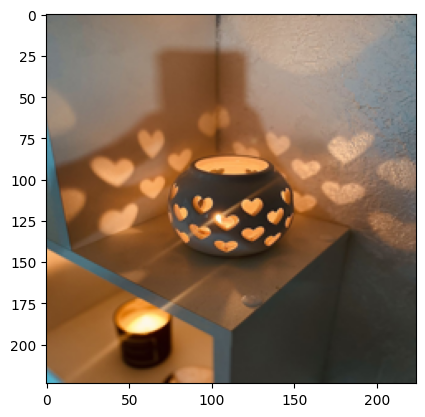

In [94]:
img_path = "https://i.pinimg.com/1200x/e6/8e/a2/e68ea2ef02d1e3e7ec0c68eb96bbcc52.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
embroidey - 66.1248 %
ceramic - 27.6960 %
glass-craft - 4.7110 %
wooden-toy - 1.4682 %


1

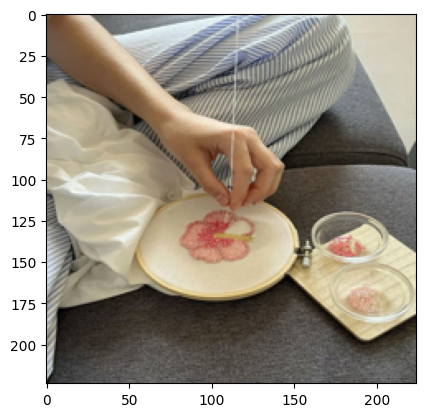

In [95]:
img_path = "https://i.pinimg.com/736x/13/e9/41/13e941b45d3ecd4936a2e42f6fcb7d12.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
embroidey - 99.8852 %
glass-craft - 0.0904 %
ceramic - 0.0227 %
wooden-toy - 0.0016 %


1

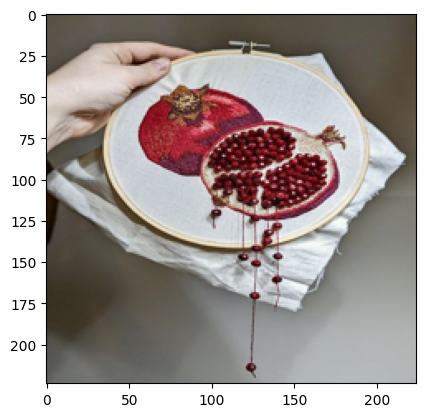

In [96]:
img_path = "https://i.pinimg.com/736x/ec/da/03/ecda0392e7d314bf06b034bebd31d9b6.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
ceramic - 79.6373 %
embroidey - 15.6402 %
wooden-toy - 2.9002 %
glass-craft - 1.8223 %


0

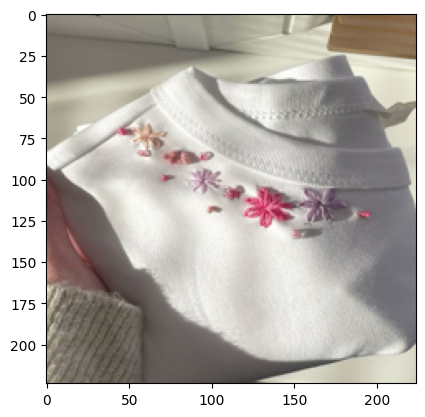

In [97]:
img_path = "https://i.pinimg.com/736x/25/ce/6b/25ce6b4b038feb9ea31961d7a8127ed5.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
embroidey - 89.8985 %
ceramic - 9.1491 %
glass-craft - 0.5813 %
wooden-toy - 0.3711 %


1

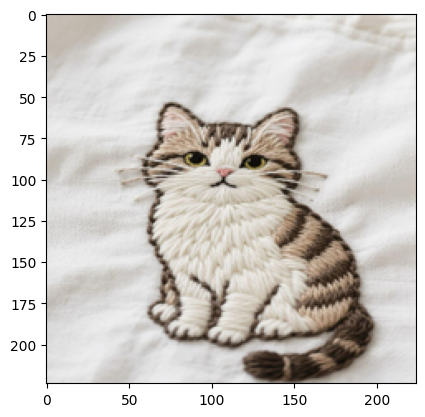

In [98]:
img_path = "https://i.pinimg.com/1200x/d4/e8/90/d4e890c15a6f6ce7e32159187e1a6df3.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
ceramic - 99.7172 %
glass-craft - 0.1459 %
embroidey - 0.0802 %
wooden-toy - 0.0567 %


0

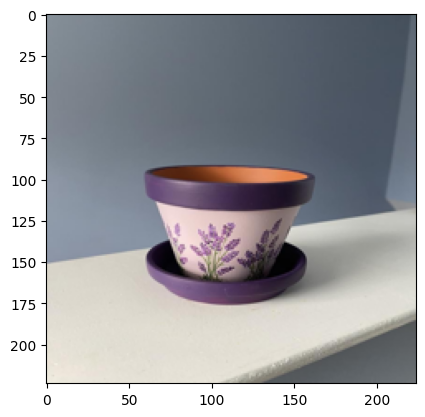

In [100]:
img_path = "https://i.pinimg.com/1200x/2f/7e/94/2f7e946affcf6fbaf47e52deb443ce9c.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
ceramic - 44.8722 %
embroidey - 44.3696 %
glass-craft - 10.6318 %
wooden-toy - 0.1264 %


0

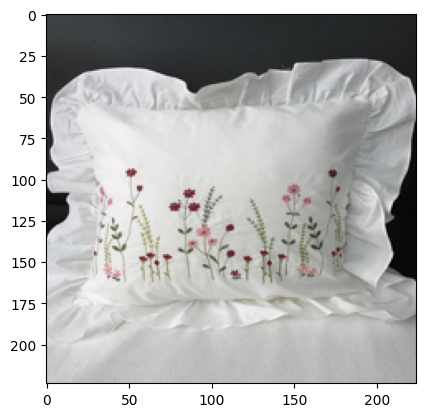

In [101]:
img_path = "https://i.pinimg.com/1200x/58/d8/11/58d81115d3cbcc0764751e72bbdd8ade.jpg"
predict_num(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
embroidey - 99.7613 %
wooden-toy - 0.1784 %
ceramic - 0.0336 %
glass-craft - 0.0268 %


1

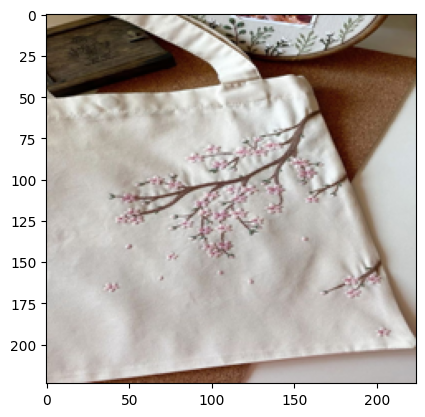

In [102]:
img_path = "https://i.pinimg.com/736x/76/f6/07/76f607bc924c713687897ab8f7a89ff6.jpg"
predict_num(img_path, model)